# Data Journalism Group Project

In [1]:
#Imports
import pandas as pd 
from statistics import mean
import matplotlib.pyplot as plt 
plt.rcParams.update({'figure.max_open_warning': 0})   #Remove max figure warning
%matplotlib inline
import numpy as np

## Data Import and Cleaning

In [2]:
#Importing the data
df = pd.read_csv('Employment Data.csv')
#Removing null values
df.dropna(inplace=True)    
#Reformatting the Occupations
for index,row in df.iterrows():
    s = row['Occupation'].replace(' |',',')
    df.at[index,'Occupation'] = s
#Removing students who did a sub-degree
df = df[df['Level of study']!='Sub-degree']
df.head()

,Academic Year,University,Level of study,Employment Situation,Occupation,Number of Graduates
0,2009/10,City University of Hong Kong,Research postgraduate,FT employment,"Authors, Journalists and Related Writers",1.0
1,2009/10,City University of Hong Kong,Research postgraduate,FT employment,Business Professionals,2.0
2,2009/10,City University of Hong Kong,Research postgraduate,FT employment,"Economists, Statisticians and Mathematicians",2.0
3,2009/10,City University of Hong Kong,Research postgraduate,FT employment,Engineering Technicians,1.0
4,2009/10,City University of Hong Kong,Research postgraduate,FT employment,Engineers,3.0


## Simple Graphs

### By University 

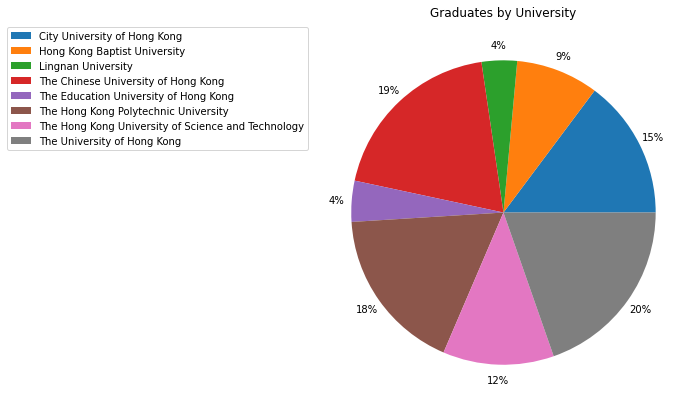

In [3]:
g = df.groupby('University')['Number of Graduates'].agg(lambda x: sum(x)).plot(kind='pie',title='Graduates by University',radius = 1,figsize=(7,7),labeldistance=None,autopct='%1.0f%%', pctdistance=1.1)
g.set(ylabel=None)
plt.legend(bbox_to_anchor=(0, 1))
plt.show()

### By Level of Study

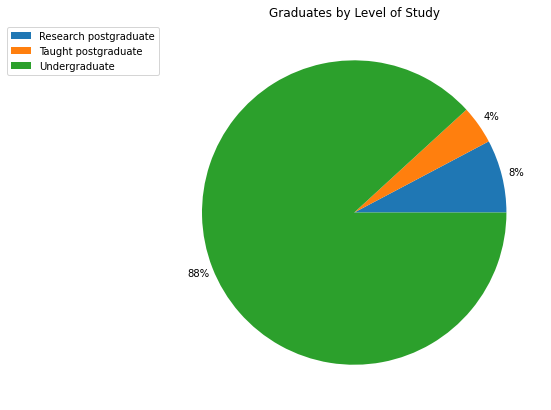

In [4]:
g = df.groupby('Level of study')['Number of Graduates'].agg(lambda x: sum(x)).plot(kind='pie',title='Graduates by Level of Study',radius = 1,figsize=(7,7),labeldistance=None,autopct='%1.0f%%', pctdistance=1.1)
g.set(ylabel=None) 
plt.legend(bbox_to_anchor=(0, 1))
plt.show()

### By Occupation

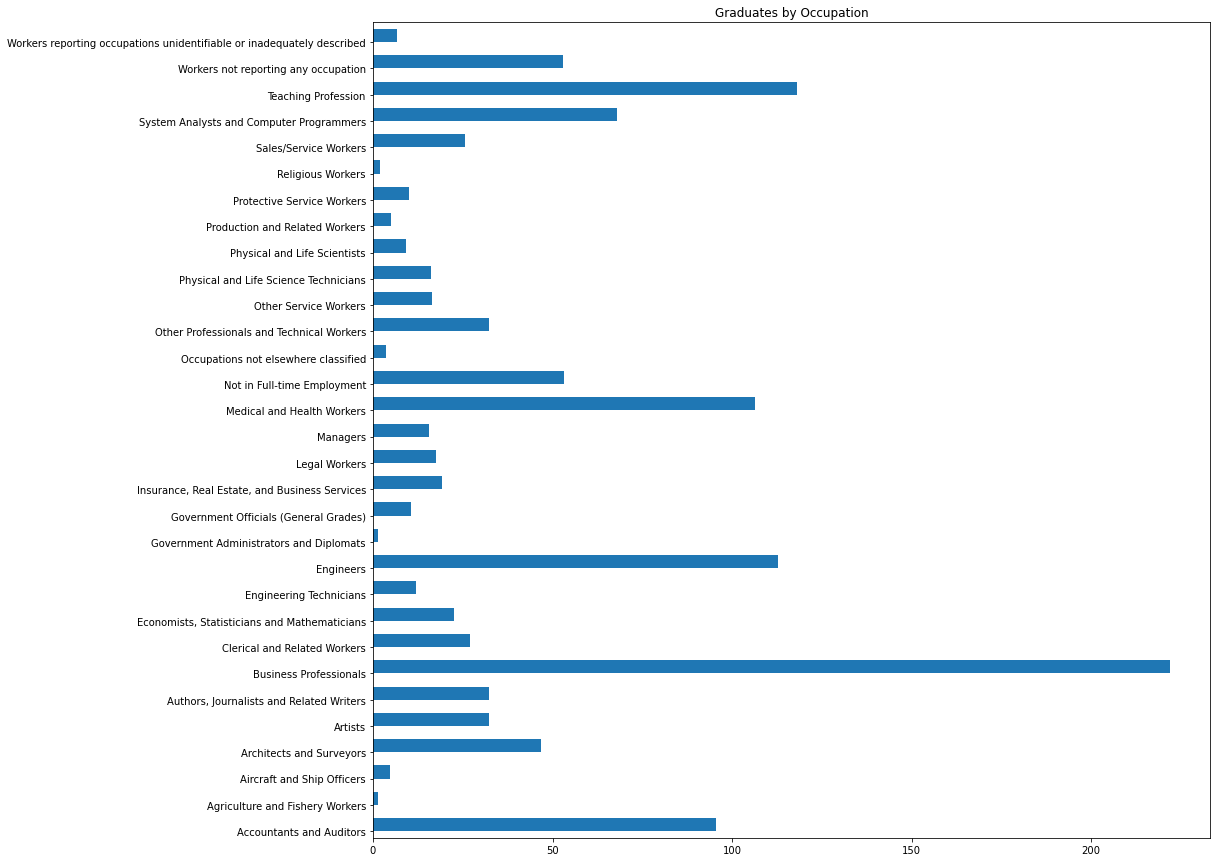

In [5]:
g = df.groupby('Occupation')['Number of Graduates'].agg(lambda x: mean(x)).plot(position=0,kind='barh',sort_columns=True,title='Graduates by Occupation',figsize=(15,15))
g.set(ylabel=None) 
plt.show()

### By Employment Situation

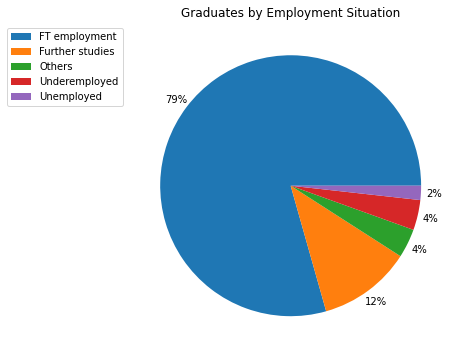

In [6]:
g = df.groupby('Employment Situation')['Number of Graduates'].agg(lambda x: sum(x)).plot(autopct='%1.0f%%', pctdistance=1.1,kind='pie',title='Graduates by Employment Situation',figsize=(15,6),labeldistance=None)
g.set(ylabel=None) 
plt.legend(bbox_to_anchor=(0, 1))
plt.show()

## Research Questions

1. Are there observable differences in the employment situation across different occuoations over the years? 
2. Are there observable differences in the employment situation across different levels of study?

### Trend of different occupations chosen by graduates in Hong Kong

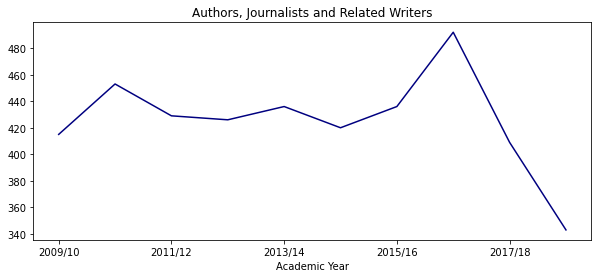

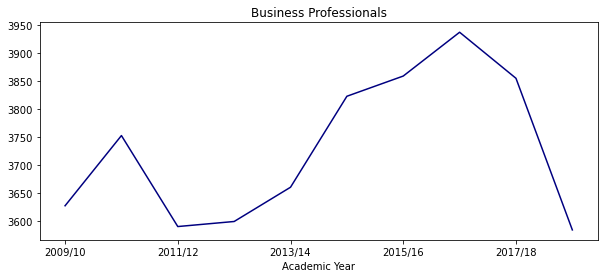

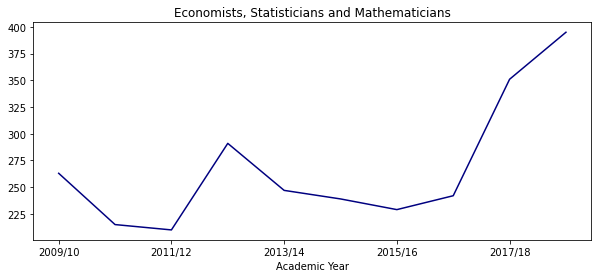

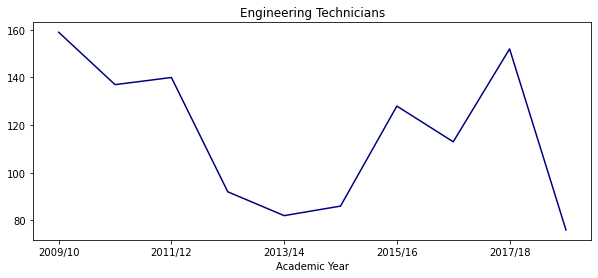

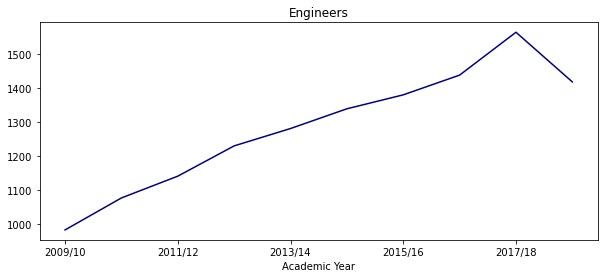

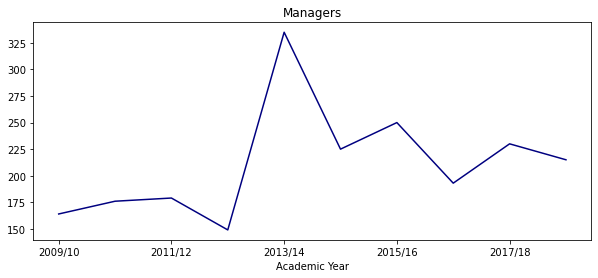

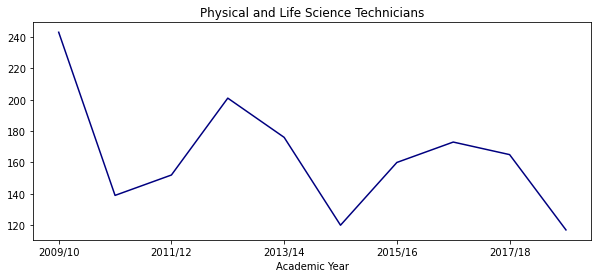

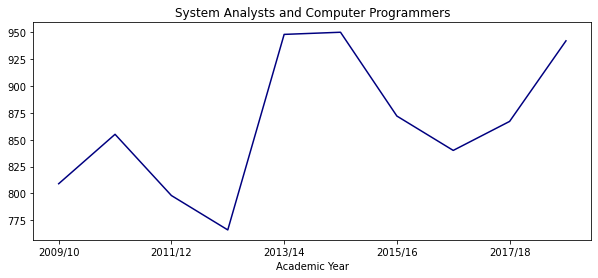

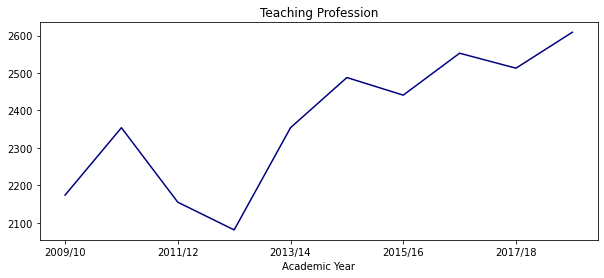

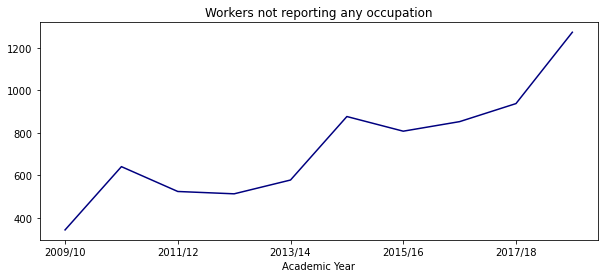

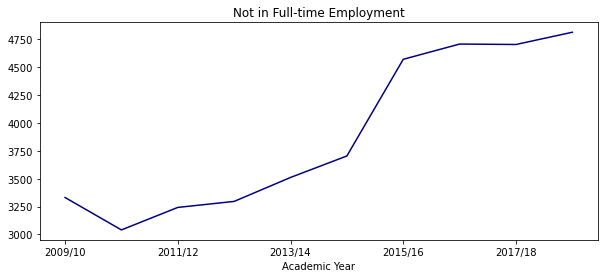

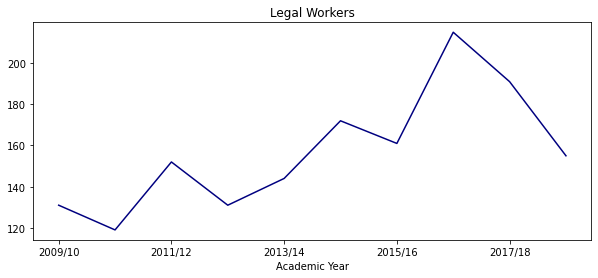

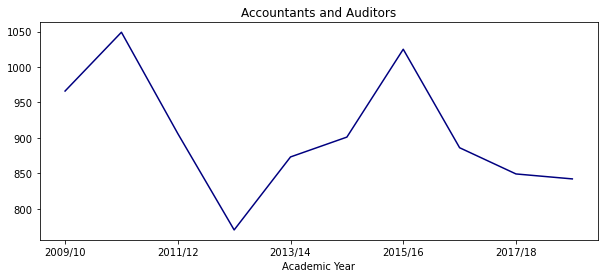

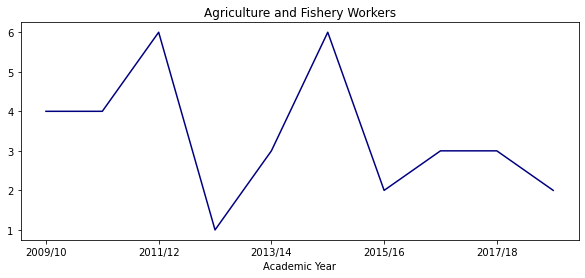

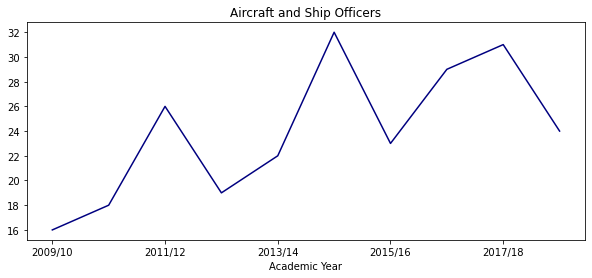

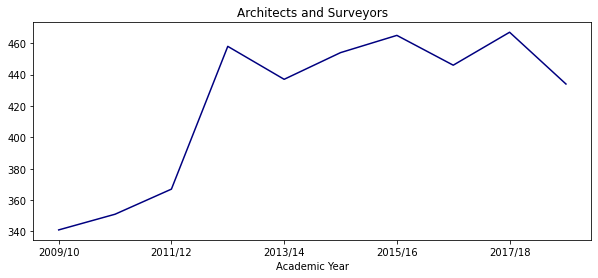

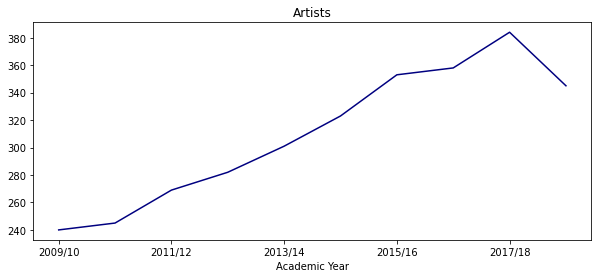

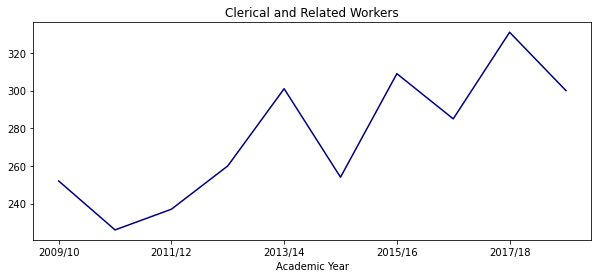

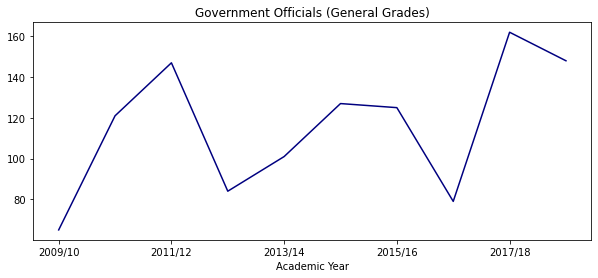

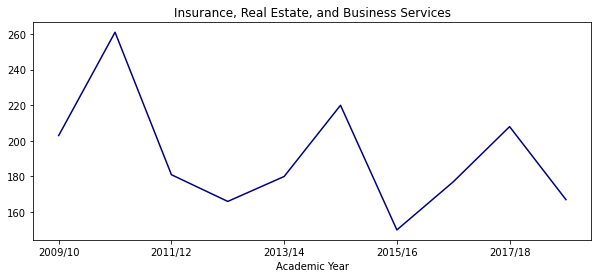

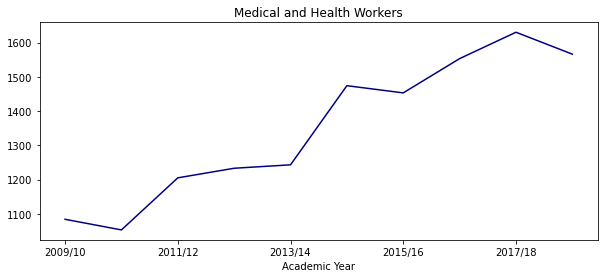

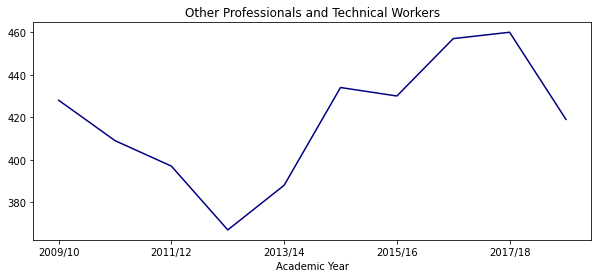

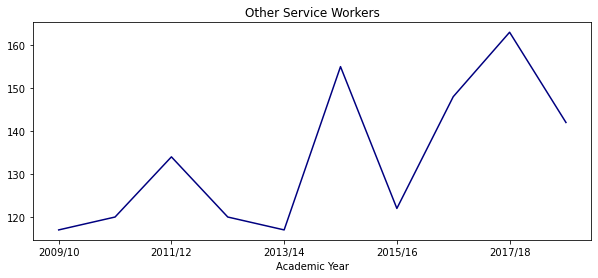

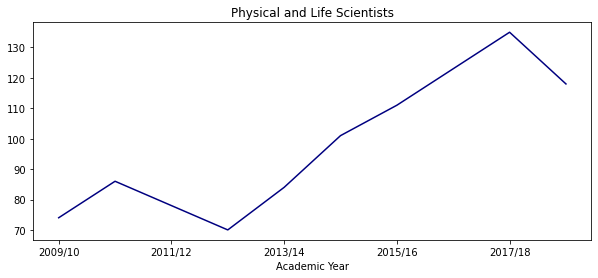

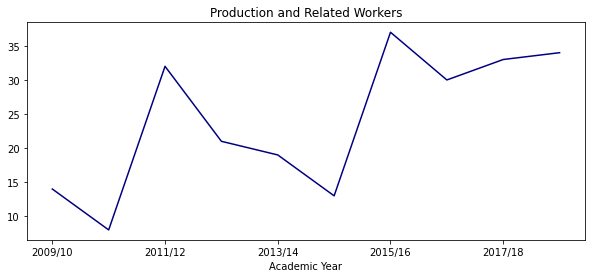

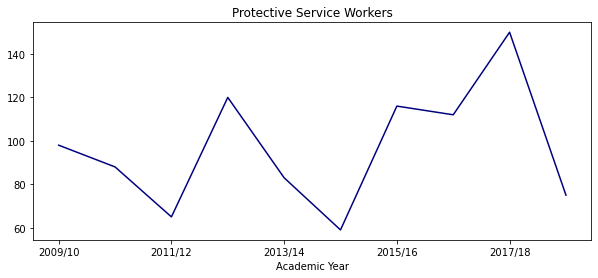

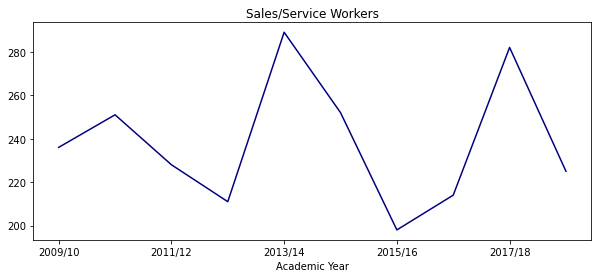

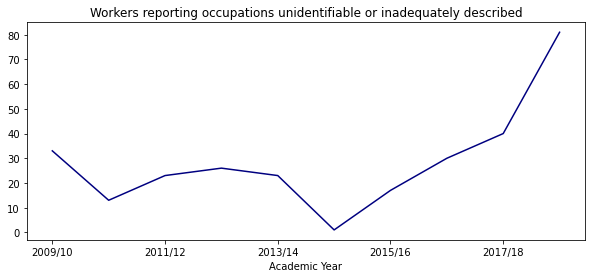

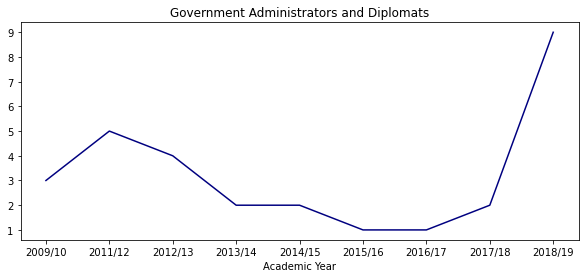

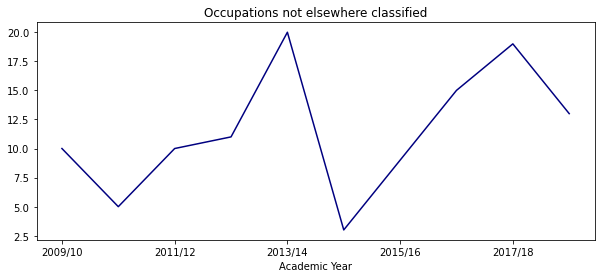

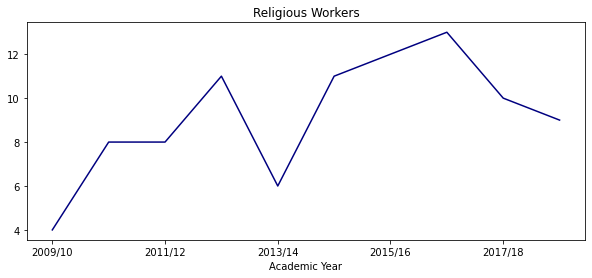

In [7]:
occ_year = df[['Academic Year', 'Occupation', 'Number of Graduates']]
occ_year = occ_year.groupby(['Occupation','Academic Year'],as_index = False).agg({'Number of Graduates':'sum'})
for occ in df['Occupation'].unique():
    temp_df = occ_year.loc[occ_year['Occupation'] == occ]
    temp_df = temp_df[['Academic Year', 'Number of Graduates']]
    temp_df.plot(title=occ,kind='line',legend=False,colormap='jet',x='Academic Year',y='Number of Graduates',figsize=(10,4))

### PG vs UG employment results

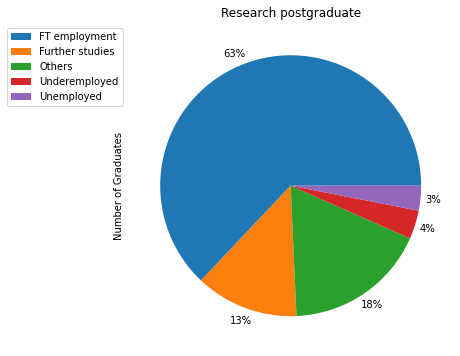

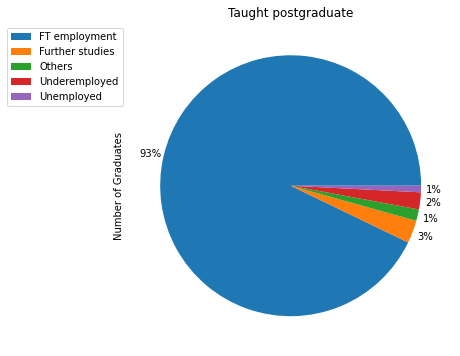

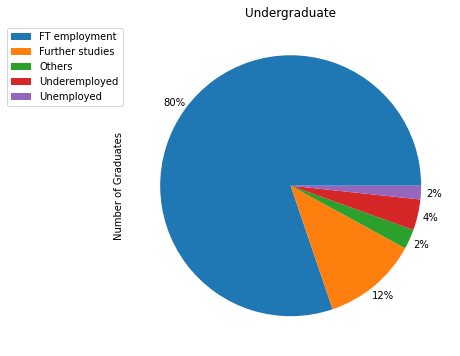

In [8]:
job_lvl_study = df[['Level of study', 'Employment Situation', 'Number of Graduates']]
job_lvl_study = job_lvl_study.groupby(['Level of study','Employment Situation'],as_index = False).agg({'Number of Graduates':'sum'})
job_lvl_study.head()
for lvl in df['Level of study'].unique():
    temp_df = job_lvl_study.loc[job_lvl_study['Level of study'] == lvl]
    temp_df = temp_df[['Employment Situation', 'Number of Graduates']]
    # Creating plot 
    temp_df.plot(autopct='%1.0f%%', pctdistance=1.1,kind='pie',title=lvl,figsize=(15,6),labeldistance=None, y='Number of Graduates')
    plt.legend(labels = temp_df['Employment Situation'], bbox_to_anchor=(0, 1))
    # show plot 
    plt.show() 

### PG vs UG occupational choices

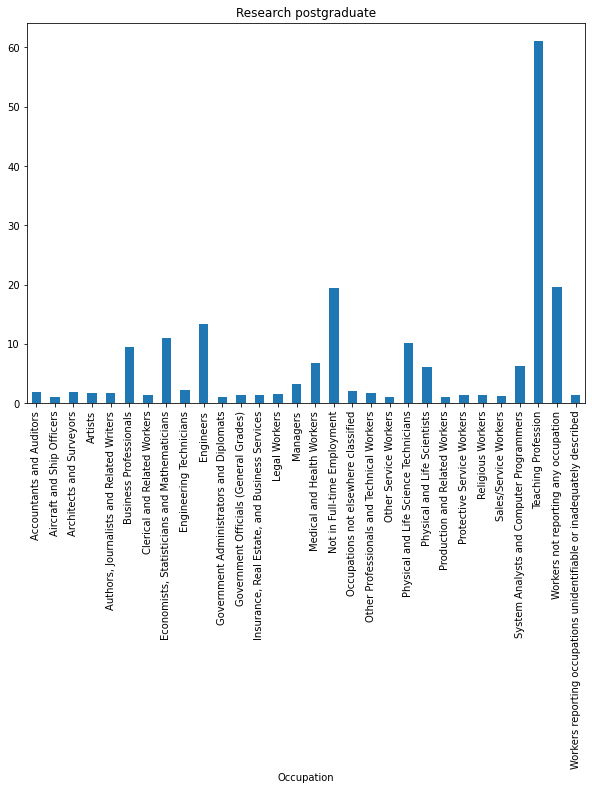

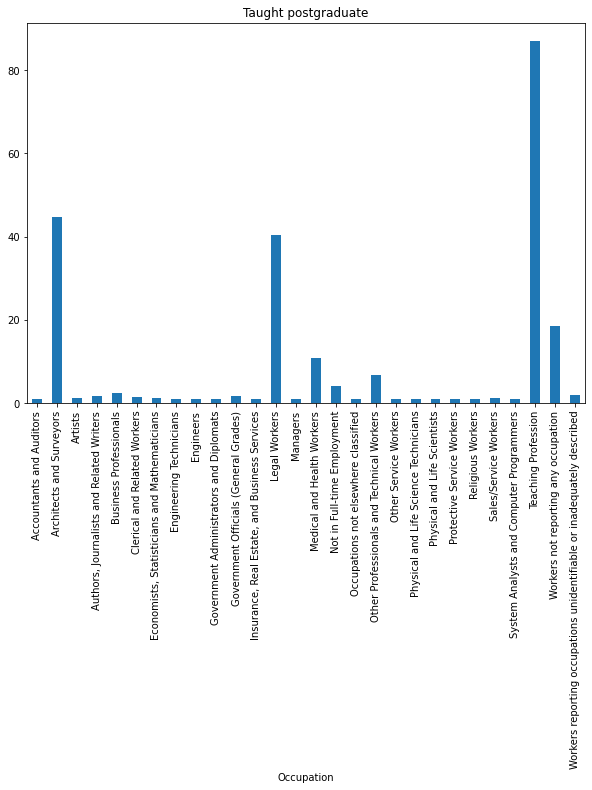

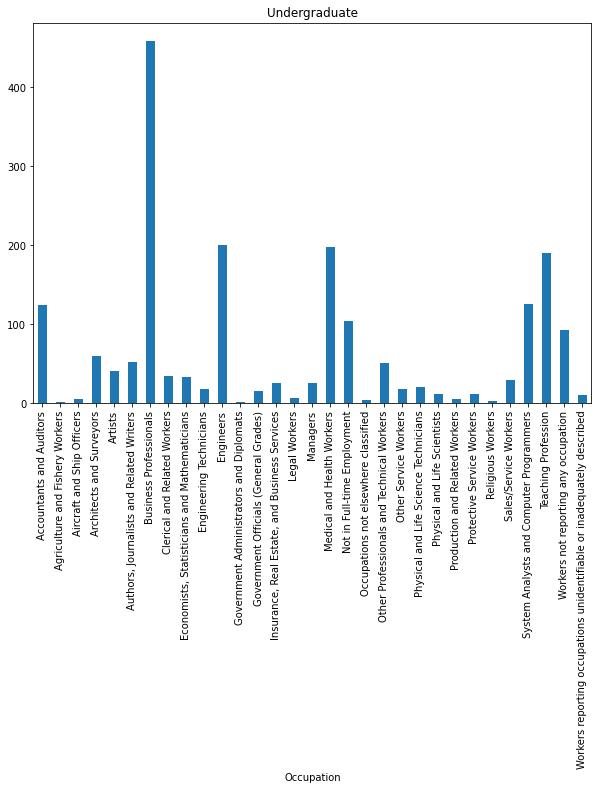

In [9]:
occ_lvl_study = df[['Level of study', 'Occupation', 'Number of Graduates']]
occ_lvl_study = occ_lvl_study.groupby(['Level of study','Occupation'],as_index = False).agg({'Number of Graduates':'mean'})
for lvl in df['Level of study'].unique():
    temp_df = occ_lvl_study.loc[occ_lvl_study['Level of study'] == lvl]
    temp_df = temp_df[['Occupation', 'Number of Graduates']].set_index('Occupation')
    temp_df.plot(kind='bar',title=lvl,figsize =(10, 7),legend=False)

### Trend of Employment Situation

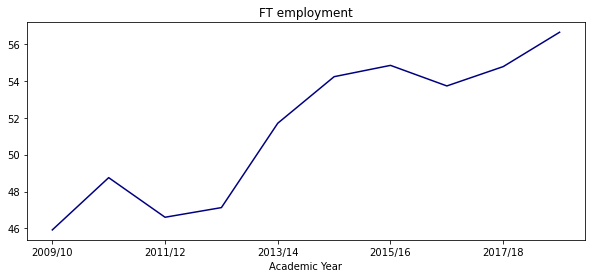

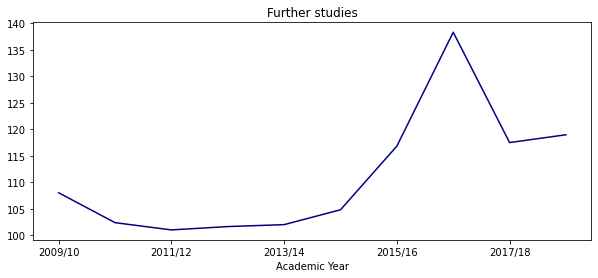

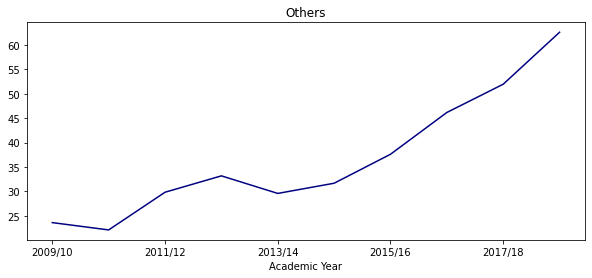

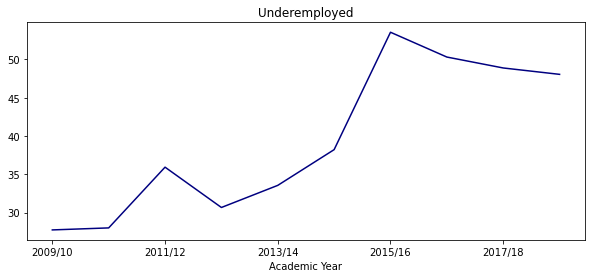

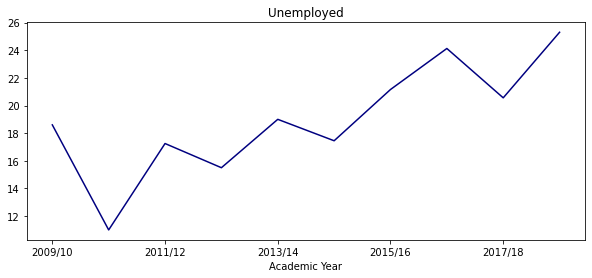

In [10]:
emp_year = df[['Academic Year', 'Employment Situation', 'Number of Graduates']]
emp_year = emp_year.groupby(['Employment Situation','Academic Year'],as_index = False).agg({'Number of Graduates':'mean'})
for emp in df['Employment Situation'].unique():
    temp_df = emp_year.loc[emp_year['Employment Situation'] == emp]
    temp_df = temp_df[['Academic Year', 'Number of Graduates']]
    temp_df.plot(title=emp,kind='line',legend=False,colormap='jet',x='Academic Year',y='Number of Graduates',figsize=(10,4))

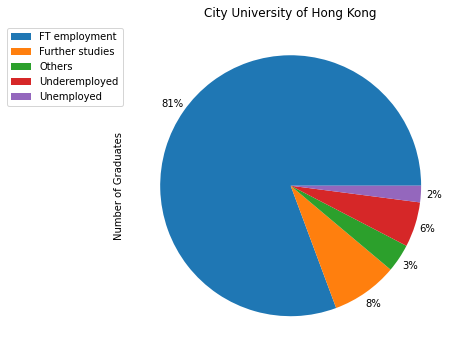

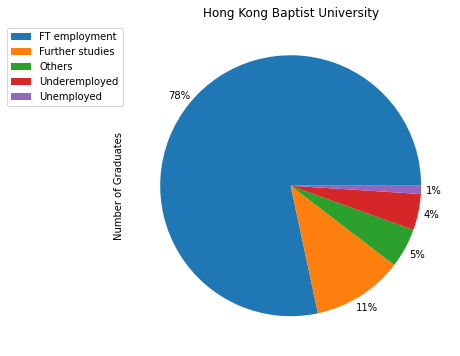

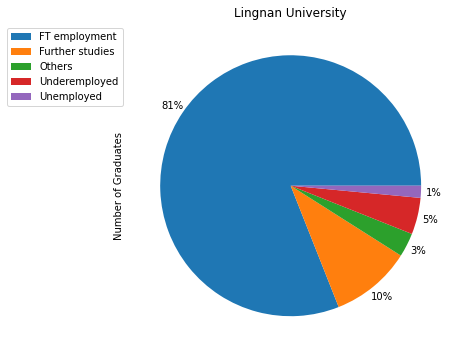

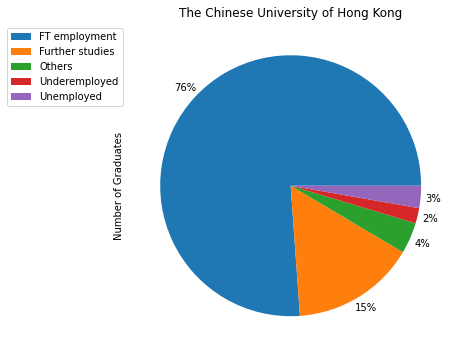

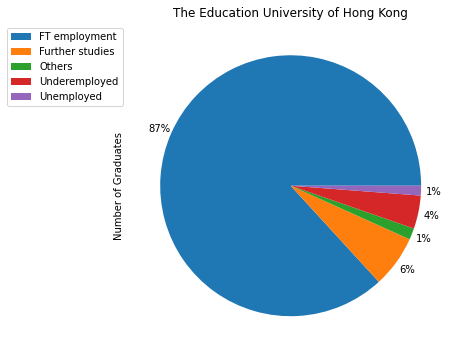

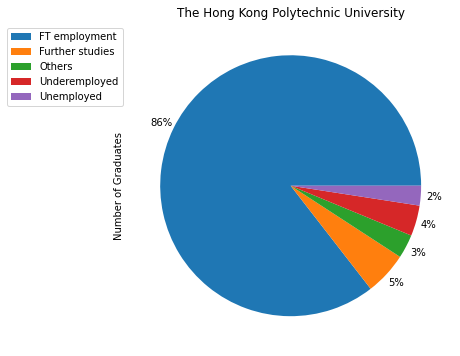

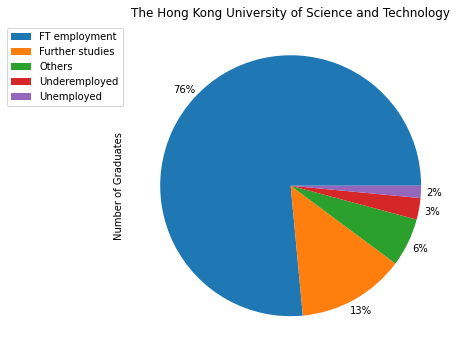

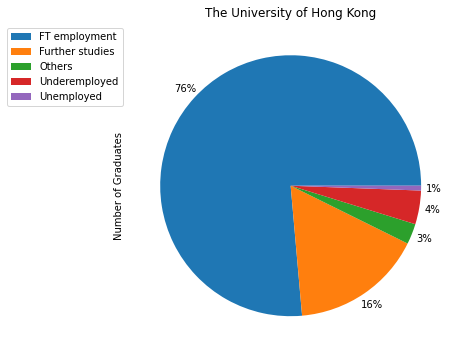

In [11]:
uni_study = df[['University', 'Employment Situation', 'Number of Graduates']]
uni_study = uni_study.groupby(['University','Employment Situation'],as_index = False).agg({'Number of Graduates':'sum'})
uni_study.head()
for uni in df['University'].unique():
    temp_df = uni_study.loc[uni_study['University'] == uni]
    temp_df = temp_df[['Employment Situation', 'Number of Graduates']]
    # Creating plot 
    temp_df.plot(autopct='%1.0f%%', pctdistance=1.1,kind='pie',title=uni,figsize=(15,6),labeldistance=None, y='Number of Graduates')
    plt.legend(labels = temp_df['Employment Situation'], bbox_to_anchor=(0, 1))
    # show plot 
    plt.show() 